In [4]:
dpArray=[]
pegs2=[]
def createArray(n):
    return [1] * n

def getSolution1(array):
    global dpArray ,pegs2
    # print the array at the start of each function call
    
    # Dynamic programming solved base case
    if (array,"Solved") in dpArray:
        
        return True
    # Dynamic programming unsolvable base case
    if (array,"Unsolvable") in dpArray:
        
        return False
    # Base case of the problem
    if goalTest(array):
        pegs2.append(array.index(1)+1)  # get the place of the remaining peg
        # print("SOLVED!!")
        return True

    moves = []
    for i in range(len(array)):
        if i < len(array) - 2:
            if array[i] == 1 and array[i + 1] == 1 and array[i + 2] == 0:
                moves.append((i, 'right'))
        if i > 1:
            if array[i] == 1 and array[i - 1] == 1 and array[i - 2] == 0:
                moves.append((i, 'left'))
    # if len(moves) == 0:
    #     # there are no possible moves to make
    #     print("This board is unsolvable")
    # else:
    #     print("Possible moves are",moves)
    # try each possible move until the new configuration found in dpArray(solved or unsolvable) or it's the base case
    solved = False
    for move in moves:
        newArray = createNewConfig(array, move)
        if getSolution1(newArray):
            # consider this new config as a solved board
            dpArray.append((newArray,"Solved"))
            solved = True    
        else:
            # store that this config can't be solved
            dpArray.append((newArray,"Unsolvable"))
        # continue to the next iteration of the for loop
        # continue

    return solved


def createNewConfig(oldConfig, move):
    index, direction = move
    newConfig = [element for element in oldConfig]
    if direction == 'right':
        newConfig[index] = 0
        newConfig[index + 1] = 0
        newConfig[index + 2] = 1
    elif direction == 'left':
        newConfig[index] = 0
        newConfig[index - 1] = 0
        newConfig[index - 2] = 1
    return newConfig


def goalTest(array):
    if sum(array) == 1:
        return True
    return False



def getInitialHoles1(board):
    indices = []
    for i in range(len(board)):
        # print("Trying the empty space at place "+str(i+1),sep=" ")
        b = [element for element in board]
        b[i] = 0
        if getSolution1(b):
            indices.append(i + 1)
    return indices

def compute_dynamic_prog(n):
  global dpArray ,pegs2
  dpArray = []
  pegs = []
  getInitialHoles1(createArray(n))
  return len(dpArray)

In [7]:
compute_dynamic_prog(8)

58

In [6]:
# dpArray=[]
# pegs2=[]
steps = 0
def createArray(n):
    return [1] * n

def getSolution(array):
    global steps
    
    if goalTest(array):
        
        return True

    moves = []
    for i in range(len(array)):
        if i < len(array) - 2:
            if array[i] == 1 and array[i + 1] == 1 and array[i + 2] == 0:
                moves.append((i, 'right'))
        if i > 1:
            if array[i] == 1 and array[i - 1] == 1 and array[i - 2] == 0:
                moves.append((i, 'left'))
    steps += len(moves)
    solved = False
    for move in moves:
        newArray = createNewConfig(array, move)
        if getSolution(newArray):
            # consider this new config as a solved board
            dpArray.append((newArray,"Solved"))
            solved = True    
        else:
            # store that this config can't be solved
            dpArray.append((newArray,"Unsolvable"))
        # continue to the next iteration of the for loop
        # continue

    return solved


def createNewConfig(oldConfig, move):
    index, direction = move
    newConfig = [element for element in oldConfig]
    if direction == 'right':
        newConfig[index] = 0
        newConfig[index + 1] = 0
        newConfig[index + 2] = 1
    elif direction == 'left':
        newConfig[index] = 0
        newConfig[index - 1] = 0
        newConfig[index - 2] = 1
    return newConfig


def goalTest(array):
    if sum(array) == 1:
        return True
    return False



def getInitialHoles(board):
    indices = []
    for i in range(len(board)):
        b = [element for element in board]
        b[i] = 0
        if getSolution(b):
            indices.append(i + 1)
    return indices

def compute_brute_force_prog(n):
  global steps 
  steps = 0
  getInitialHoles(createArray(n))
  return steps

In [8]:
compute_brute_force_prog(8)

170

In [21]:
PLOT_TO = 20
x = [ i for i in range(4,PLOT_TO+1)]
val_using_dp = map(compute_dynamic_prog,x)
val_using_bruteforce = map(compute_brute_force_prog,x)

In [22]:
val_using_dp = list(val_using_dp)
val_using_bruteforce = list(val_using_bruteforce)

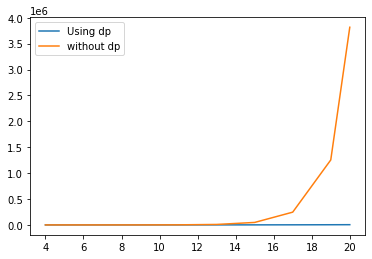

In [29]:
import matplotlib.pyplot as plt
line, = plt.plot(x, val_using_dp, label = "Using dp")
line2, = plt.plot(x, val_using_bruteforce, label = "without dp")
plt.legend()
plt.savefig('task2-2.png')
plt.show()

In [23]:
val_using_dp

[6,
 10,
 20,
 30,
 58,
 86,
 156,
 226,
 374,
 522,
 796,
 1070,
 1530,
 1990,
 2708,
 3426,
 4486]

In [25]:
val_using_bruteforce

[6,
 12,
 32,
 54,
 170,
 288,
 964,
 1642,
 5350,
 9060,
 28472,
 47886,
 147138,
 246392,
 750156,
 1253922,
 3815710]